# Classification metrics
- https://en.wikipedia.org/wiki/Precision_and_recall
- https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

A few common metrics besides accuracy that are useful for evaluating classification models:

- Precision: The ratio of correctly predicted positive observations to the total predicted positives.
- Recall: The ratio of correctly predicted positive observations to the all observations in actual class.
- F1 Score: The weighted average of Precision and Recall.
- ROC AUC: Area Under the Receiver Operating Characteristic Curve, useful for evaluating the performance of a binary classifier.

In [11]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, make_scorer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target

In [14]:
# Create the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [21]:
# Define the K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
# Define custom scoring functions
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
    # Note: ROC AUC is typically used for binary classification, so it's not included here for the multi-class problem
}

In [23]:
# Perform K-Fold Cross-Validation with multiple metrics
cv_results = cross_validate(rf_clf, X, y, cv=kf, scoring=scoring)

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_results['test_accuracy']}")
print(f"Mean CV Accuracy: {np.mean(cv_results['test_accuracy']):.2f}")
print(f"Cross-Validation Precision Scores: {cv_results['test_precision_macro']}")
print(f"Mean CV Precision: {np.mean(cv_results['test_precision_macro']):.2f}")
print(f"Cross-Validation Recall Scores: {cv_results['test_recall_macro']}")
print(f"Mean CV Recall: {np.mean(cv_results['test_recall_macro']):.2f}")
print(f"Cross-Validation F1 Scores: {cv_results['test_f1_macro']}")
print(f"Mean CV F1 Score: {np.mean(cv_results['test_f1_macro']):.2f}")

Cross-Validation Accuracy Scores: [1.         0.96666667 0.93333333 0.93333333 0.96666667]
Mean CV Accuracy: 0.96
Cross-Validation Precision Scores: [1.         0.96969697 0.93333333 0.93888889 0.97222222]
Mean CV Precision: 0.96
Cross-Validation Recall Scores: [1.         0.95238095 0.93333333 0.93888889 0.97222222]
Mean CV Recall: 0.96
Cross-Validation F1 Scores: [1.         0.95848596 0.92592593 0.93888889 0.97101449]
Mean CV F1 Score: 0.96


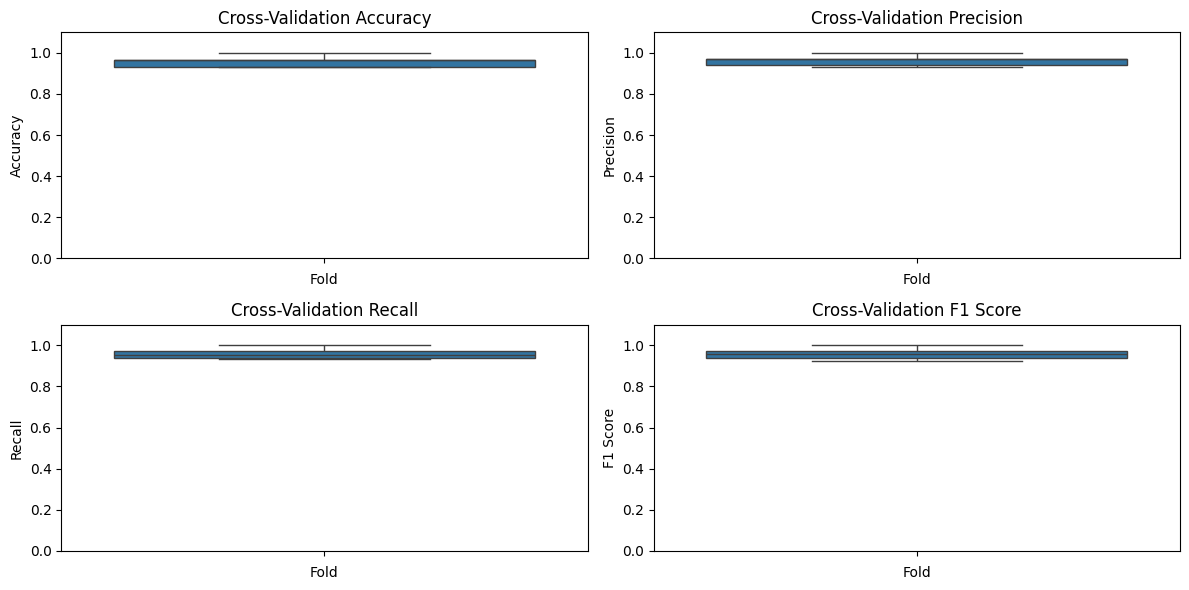

In [24]:
# Convert cv_results to a DataFrame for easier plotting
cv_results_df = pd.DataFrame(cv_results)

# Plot the metrics
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(2, 2, 1)
sns.boxplot(data=cv_results_df['test_accuracy'])
plt.title('Cross-Validation Accuracy')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.1)

# Precision
plt.subplot(2, 2, 2)
sns.boxplot(data=cv_results_df['test_precision_macro'])
plt.title('Cross-Validation Precision')
plt.xlabel('Fold')
plt.ylabel('Precision')
plt.ylim(0.0, 1.1)

# Recall
plt.subplot(2, 2, 3)
sns.boxplot(data=cv_results_df['test_recall_macro'])
plt.title('Cross-Validation Recall')
plt.xlabel('Fold')
plt.ylabel('Recall')
plt.ylim(0.0, 1.1)

# F1 Score
plt.subplot(2, 2, 4)
sns.boxplot(data=cv_results_df['test_f1_macro'])
plt.title('Cross-Validation F1 Score')
plt.xlabel('Fold')
plt.ylabel('F1 Score')
plt.ylim(0.0, 1.1)

plt.tight_layout()
plt.show()
